In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
from tqdm import tqdm
import pandas as pd
import random
import ast


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment-1-nlp/test_small.csv
/kaggle/input/assignment-1-nlp/train.csv


In [2]:
df = pd.read_csv('/kaggle/input/assignment-1-nlp/train.csv') # loading training data
data = []
for index, row in tqdm(df.iterrows()):
    data.append(ast.literal_eval(row['tagged_sentence'])) # changing data-type of entries from 'str' to 'list'

47340it [00:12, 3740.89it/s]


In [3]:
df = pd.read_csv('/kaggle/input/assignment-1-nlp/test_small.csv') # loading test data
test_data = {} 
for index, row in tqdm(df.iterrows()):
    test_data[row['id']] = ast.literal_eval(row['untagged_sentence']) # changing data-type of entries from 'str' to 'list'

4000it [00:00, 6803.32it/s]


In [4]:
def display_data(sentence_index):
    '''
        Input : 'sentence_index' (int) -> index of a sentence in training data
        Output: None
    '''
    sentence = data[sentence_index]
    print("TOKEN -> TAG")
    print('...')
    for token, tag in sentence:
        print(token, '>', tag)
sentence_index = random.choice(range(len(data)))
display_data(sentence_index)

TOKEN -> TAG
...
Press > VB
clay > NN
into > IN
mold > NN
as > CS
instructed > VB
in > IN
General > NN
Directions > NN
. > .


In [5]:
# cell to show the frequency of each distinct (slack or native) present in the training data
from collections import Counter
distinct_tags = []
word_tags = []
def store_tags():
    
    global distinct_tags
    global word_tags
    
    for sent in data:
        word_tags.append(('START','START'))
        for words, tag in sent:
            word_tags.extend([(tag, words)])
        word_tags.append(('END','END'))
    
store_tags()
tags=[]
for tag, words in word_tags:
    tags.append(tag)
distinct_tags=list(set(tags))
count_tags = {}
for tag, count in Counter(tags).items():
    count_tags[tag] = count

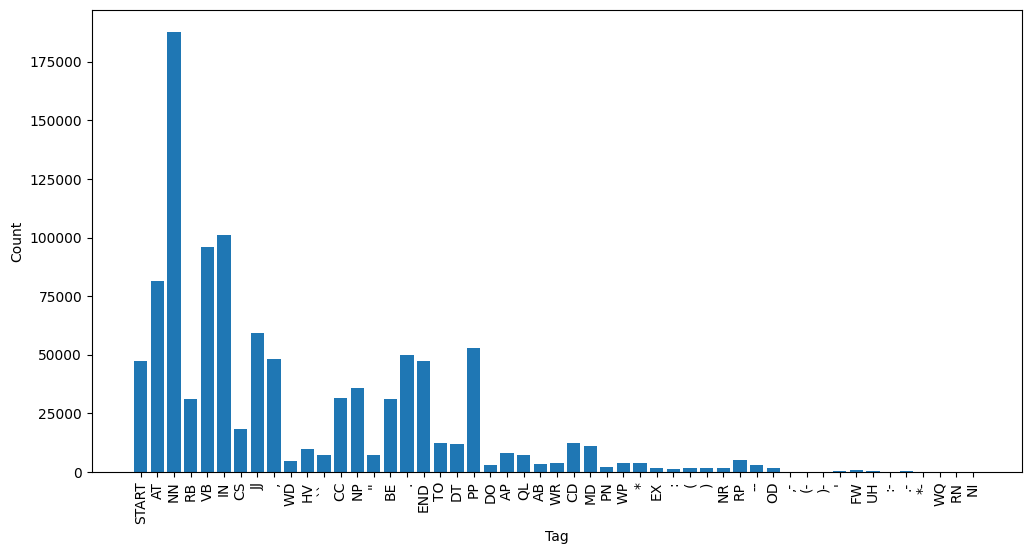

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.xticks(rotation='vertical')
plt.bar(range(len(count_tags)), list(count_tags.values()), align='center')
plt.xticks(range(len(count_tags)), list(count_tags.keys()))
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

In [7]:
submission = {'id': [], 'tagged_sentence' : []} # dictionary to store tag predictions
# NOTE ---> ensure that tagged_sentence's corresponing 'id' is same as 'id' of corresponding 'untagged_sentence' in training data
def store_submission(sent_id, tagged_sentence):
    
    global submission
    submission['id'].append(sent_id)
    submission['tagged_sentence'].append(tagged_sentence)
    
def clear_submission():
    global submission
    submission = {'id': [], 'tagged_sentence' : []}

In [8]:
def hmm_tagger_util(sent_id, untagged_sentence):
    store_submission(sent_id, tagged_sentence)

In [9]:
def memm_tagger_util(sent_id, untagged_sentence):
    store_submission(sent_id, tagged_sentence)

In [10]:
# cell to implement tagger that allots random tags to words in a sentence

def random_tagger_util(sent_id, untagged_sentence):
    if(sent_id in list(submission['id'])):
        return
    tagged_sentence = []
    for word in untagged_sentence:
        tagged_sentence.append((word, random.choice(distinct_tags)))
    store_submission(sent_id, tagged_sentence)
    

In [11]:
for sent_id in tqdm(list(test_data.keys())):
    sent = test_data[sent_id]
    random_tagger_util(sent_id, sent)

100%|██████████| 4000/4000 [00:00<00:00, 15199.92it/s]


In [12]:
path_to_directory = '/kaggle/working/'
pd.DataFrame(submission).to_csv(path_to_directory +' sample_submission.csv', index = False)